# Make sure to convert int data to float by doing 1.0 instead of 1 !!!!

In [50]:
import numpy as np
import cv2
import scipy.stats as stats
import mpmath as mp
import matplotlib.pyplot as plt
import seaborn as sns
import skimage


In [51]:
# plt.cmap()

In [52]:
def see(img):
    plt.imshow(img)
    plt.show()

In [53]:
def extract_coins_red(img, mask):
#     returns location of pixels in coins, given a mask
#    assumes 255 corresponds to a coin pixel location

# NB !!! MASK IS IN BGR

    i, j = np.where(mask[:,:,2] == 255)
    coins=img[i,j]
    return coins

In [54]:
def extract_coins_blue(img, mask):
#     returns location of pixels in coins, given a mask
#    assumes 255 corresponds to a coin pixel location

# NB !!! MASK IS IN BGR
    i, j = np.where(mask[:,:,0] == 255)
    coins=img[i,j]
    return coins

In [55]:
def extract_desk(img, mask):
#     returns location of pixels in coins, given a mask
#    assumes 255 corresponds to a coin pixel location

# NB !!! MASK IS IN BGR

    i, j = np.where(mask[:,:,1] == 255)
    desk=img[i,j]
    return desk

In [56]:
def get_channels(img):
    # import images (will be in bgr because of cv2)
    img_bgr = cv2.imread(img)
#     mask_bgr = cv2.imread(mask)
    
    # binarise the mask because it contains grey pixels due to interpolation from jpeg compression:
#     binary = skimage.filters.threshold_otsu(mask_bgr[:,:,0])
#     m = mask_bgr[:,:,0]>binary
    
    # get r,g, and b of img_bgr:
    img_r = img_bgr[:,:,2]
    img_g = img_bgr[:,:,1]
    img_b = img_bgr[:,:,0]
    
    # convert img_bgr to HSV:
    img_hsv = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2HSV)
    
    # get H, S and V of img_hsv
    img_H = img_hsv[:,:,0]
    img_S = img_hsv[:,:,1]
    img_V = img_hsv[:,:,2]
    
    print('r,g,b,h,s,v')
    see(img_r)
    see(img_g)
    see(img_b)
    see(img_H)
    see(img_S)
    see(img_V)
#     see(m)
    
    return(img_r,img_g,img_b,img_H,img_S,img_V)

In [57]:
mask = cv2.imread('l67.png')

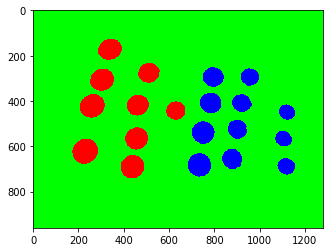

In [58]:
see(mask)

r,g,b,h,s,v


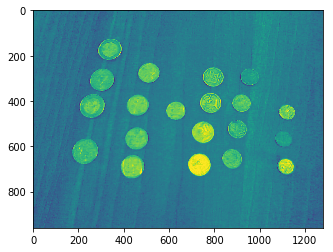

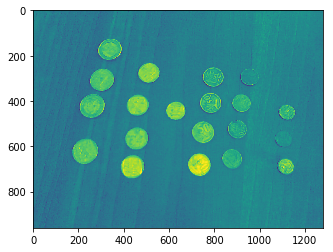

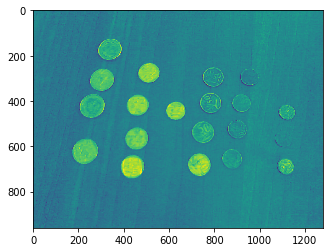

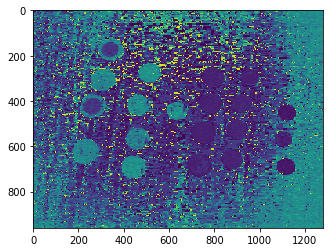

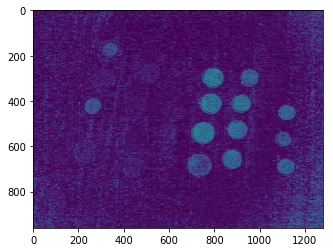

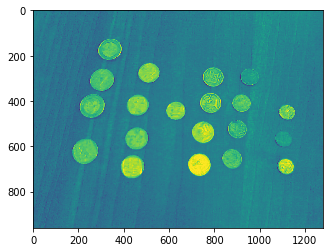

In [82]:
I = get_channels('t67.jpg')

In [83]:
red_coins = extract_coins_red(I[3],mask) #H
blue_coins = extract_coins_blue(I[3],mask) #H
desk = extract_desk(I[3], mask) #H

In [84]:
cμr = np.mean(red_coins)
cσr = np.var(red_coins)

cμb = np.mean(blue_coins)
cσb = np.var(blue_coins)

dμ = np.mean(desk)
dσ = np.var(desk)

#         from tut 4 (4.7)
λr = red_coins.size/I[0].size # ratio of coin pixels: pixels
λb = blue_coins.size/I[0].size # ratio of coin pixels: pixels
λd = desk.size/I[0].size # ratio of coin pixels: pixels


print('cμr,cσr, λr \n cμb,cσb λb \n λd:',cμr,cσr, λr,cμb,cσb,λb,λd)
# return cμr,cσr, λr,dμb,cμb,λb,λd

print('λr, λb,λd',λr, λb,λd)

cμr,cσr, λr 
 cμb,cσb λb 
 λd: 16.80571200638213 35.27070052017097 0.051005045572916664 73.70067193447917 585.8342837796725 0.056438802083333336 0.89255615234375
λr, λb,λd 0.051005045572916664 0.056438802083333336 0.89255615234375


In [85]:
red_coins.shape

(62675,)

In [86]:
red_coins1 = extract_coins_red(I[3],mask)[:100] #H
blue_coins1 = extract_coins_blue(I[3],mask)[:100] #H
desk1 = extract_desk(I[3], mask)[:100] #H

In [88]:
cμr = np.mean(red_coins1)
cσr = np.var(red_coins1)

cμb = np.mean(blue_coins1)
cσb = np.var(blue_coins1)

dμ = np.mean(desk1)
dσ = np.var(desk1)

#         from tut 4 (4.7)

print('cμr,cσr, λr,',cμr,cσr,λr,'\n cμb,cσb λb',cμb,cσb,λb,'\n ,dμ,dσ λd:',dμ,dσ,λd)
# return cμr,cσr, λr,dμb,cμb,λb,λd

# print('λr, λb,λd',λr, λb,λd)

cμr,cσr, λr, 16.9 67.49 0.051005045572916664 
 cμb,cσb λb 87.01 633.5098999999999 0.056438802083333336 
 ,dμ,dσ λd: 68.03 3295.0090999999998 0.89255615234375


In [89]:
print(red_coins1)

[ 9  9  9  6  8 19 19 19 19 15 17 19 23 33 20 13 13 23 27 20 17 10 11 10
 10  7  8  8 11 18 18 21 24 25 24 25 22 30 27 23 23 23 23 25 24 13 13 14
 11  8  8  7  5  8  5  3  0  5  7  9 19 22 24 26 26 26 26 25 24 28 30 27
 22 23 24 30 18 14 14 11  9  9  9  8  9  9  7  5  3  7 16 13 13 18 25 30
 29 28 31 30]


In [81]:
I[1]

array([[106, 112, 117, ..., 115, 116, 117],
       [108, 113, 118, ..., 116, 116, 116],
       [114, 117, 120, ..., 116, 116, 115],
       ...,
       [109, 105, 104, ..., 110, 111, 111],
       [105, 102, 102, ..., 110, 111, 112],
       [101,  98, 100, ..., 110, 111, 112]], dtype=uint8)

In [103]:
# MAP

def MAP(data,full_channel,δ1):
    γ1 =100.0
    β1 =1.0
    α1 =0.1
    cμ = (full_channel.size*np.mean(data) + γ1*δ1) / (full_channel.size + γ1)
    # dμ = (desk.size*np.mean(desk) + γ2*δ2) / (desk.size + γ2)

    cσ = ( (np.sum((data-cμ)**2)) + 2*β1 + γ1*(δ1-cμ)**2 ) / (full_channel.size + 3 + 2*α1)
    # dσ = ( (np.sum((desk-dμ)**2)) + 2*β2 + γ2*(δ2-dμ)**2 ) / (desk.size + 3 + 2*α2)

    print('cμ,cσ: ',cμ,cσ)
    return cμ,cσ

In [104]:
red = MAP(red_coins1, red_coins,60)

cμ,cσ:  16.968657905217047 3.0620073907454084


In [105]:
green = MAP(desk1,desk,80)

cμ,cσ:  68.03109128404108 0.31349001528678855


In [106]:
blue = MAP(blue_coins1,blue_coins,20)

cμ,cσ:  86.9135160974486 7.369249667893634


In [107]:
blue_coins.size

69352

In [108]:
red_coins.size , desk.size

(62675, 1096773)

In [109]:
# MOG

In [133]:
def E(X, K,μ,Σ,λ):
    
    
    #  Compute numerator for qi(hi) = Pr(hi = k|xi ,θ[t]):
    #  λ_k*Norm_xi[μ_k , Σ_k ]
    # for each Gaussian (k)
    numerators = np.zeros((K,X.shape[0]))
    for k in range(K):
        numerators[k] = stats.multivariate_normal.pdf(X, μ[k], Σ[k],allow_singular=True)*λ[k]
        # this part is relatively fast


    denominator = np.sum(numerators,axis=0)
#     print('denominator',denominator.shape)
#     print('numerators',numerators.shape)

    # Compute posterior (responsibilities) by normalizing
    responsibilities = numerators/denominator
#     print(responsibilities[0])
#     print(np.sum(responsibilities[0]))
#     print('responsibilities',responsibilities.shape)
    rsum = np.sum(responsibilities,axis=1)
    print('responsibilities',responsibilities)
    return responsibilities

In [236]:
def M(X, K,responsibilities,λ,μ,Σ):
       # Maximization Step (eqn (7.19) in CVM (Prince))

    rsum = np.sum(responsibilities,axis=1)
#         newmu = np.zeros((K,X.shape[1]))
    # if X is 1D use this:
    newmu = np.zeros((K,1 ))

    for k in range(K):
    # update λ's
#         print('before λ[k]',λ[k])
        λ[k] = rsum[k]/np.sum(rsum) 
#         print('λ[k]',λ[k])
    # update μ's

#             for i in range(X.shape[0]):
# #                 pass
#             print('rsum[k]',rsum[k])
        for i in range(len(X)):
            newmu[k] += (responsibilities[k,i]*X[i])
#     newmu[k] +responsibilities[k,i]*X[i]
        newmu[k] =  newmu[k] /rsum[k]

#             newmu[k] = newmu[k]/rsum[k]
#             print('newmu[',k,']/rsum',newmu[k])
        μ[k] = newmu[k]
#             print('total time for μ[k] ',total)
        print('μ[k]',μ[k])


    # update Σ's 
#             Σ[k] = 0.0
        for i in range(len(X)):
            Σ[k] += responsibilities[k,i]*((X[i]-μ[k])**2)
        Σ[k] /= rsum[k]


#             print('total time for Σ[k]',total)  
    print('λ',λ,'\n μ',μ,'\n Σ',Σ)
    return λ,μ,Σ


In [237]:
data = np.array([0.0,0.1,1.1,1.2,0.3])

In [238]:
data

array([0. , 0.1, 1.1, 1.2, 0.3])

In [239]:
# E(X, K,μ,Σ,λ):
#  mu and sigma must be rows, each row represents the parameter for each gaussian
# data must be a numpy array!
teepa = E(data,2,[[0.5],[0.75]],[ [0.4],[ 0.3]], [0.5,0.5])

responsibilities [[0.61802151 0.58911926 0.40379569 0.39679411 0.5358531 ]
 [0.38197849 0.41088074 0.59620431 0.60320589 0.4641469 ]]


In [240]:
teepa.T

array([[0.61802151, 0.38197849],
       [0.58911926, 0.41088074],
       [0.40379569, 0.59620431],
       [0.39679411, 0.60320589],
       [0.5358531 , 0.4641469 ]])

In [241]:
resp = np.array([[0.606,0.593,0.402,0.378,0.563],[0.394,0.407,0.598,0.622,0.437]])

In [242]:
resp

array([[0.606, 0.593, 0.402, 0.378, 0.563],
       [0.394, 0.407, 0.598, 0.622, 0.437]])

In [243]:
# initialise some parameters:
λ = np.zeros((2))
μ = np.zeros((2,1))
Σ = np.zeros((2,1))

In [244]:
# M(X, K,responsibilities):
mstep_teepa = M(data,2,resp,λ,μ,Σ)

μ[k] [0.44217152]
μ[k] [0.64117168]
λ [0.5084 0.4916] 
 μ [[0.44217152]
 [0.64117168]] 
 Σ [[0.23223415]
 [0.26532686]]
